# Проект: Предсказание цены на подержанные автомобили Opel

### ФИО: Исоев Исо Ниёзович

### Описание проекта


**Задача проекта** — построить модель, которая будет предсказывать цену автомобиля на основе данных о характеристиках. 
**Целью** является создание инструмента для авто продавцов, который поможет точно оценить стоимость подержанных автомобилей, а также поможет покупателям в оценке рыночной стоимости автомобилей, что сделает процесс покупки-продажи более прозрачным и удобным.

### 1. Загрузка и изучение данных

In [236]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

# Загрузка данных из CSV файла
data = pd.read_csv("Opel_data.csv")

# Первоначальный осмотр данных
print(data.head())
print(data.info()) 
print(data.describe())

          Model  Price  Year Transmission     Fuel type      City
0    Opel Combo  69000  2007      Автомат        Дизель   Худжанд
1  Opel Astra H  98500  2010     Механика        Бензин  Кабодиён
2  Opel Astra G  65000  2004     Механика  Бензин + газ    Фархор
3  Opel Astra G  64000  1998     Механика  Бензин + газ    Вахдат
4  Opel Astra F  13500  1992     Механика           Газ    Вахдат
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7098 entries, 0 to 7097
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Model         7098 non-null   object
 1   Price         7098 non-null   int64 
 2   Year          7098 non-null   int64 
 3   Transmission  7098 non-null   object
 4   Fuel type     7098 non-null   object
 5   City          7098 non-null   object
dtypes: int64(2), object(4)
memory usage: 332.8+ KB
None
               Price         Year
count    7098.000000  7098.000000
mean    48971.443787  1999.223584
std

### 2. Предобработка данных

In [238]:
# Проверка на пропуски
print(data.isnull().sum())  # Покажет количество пропусков в каждом столбце

# Заполнение пропусков в столбце 'Price' средним значением
data['Price'] = data['Price'].fillna(data['Price'].mean())

# Если пропуски есть в других столбцах, применяем аналогичный подход
data['Year'] = data['Year'].fillna(data['Year'].mean())

# Удаление аномальных значений, например, автомобилей, выпущенных в будущем
data = data[data['Year'] <= 2025]

# Удаление строк с пропусками
data = data.dropna()

# Проверяем снова на наличие пропусков
print(data.isnull().sum())


Model           0
Price           0
Year            0
Transmission    0
Fuel type       0
City            0
dtype: int64
Model           0
Price           0
Year            0
Transmission    0
Fuel type       0
City            0
dtype: int64


In [242]:
# Проверка уникальных значений
print("Уникальные значения в столбцах:")
print("Model:", data['Model'].nunique())
print("Transmission:", data['Transmission'].unique())
print("Fuel type:", data['Fuel type'].unique())
print("City:", data['City'].nunique())

Уникальные значения в столбцах:
Model: 27
Transmission: ['Автомат' 'Механика' 'Робот' 'Вариатор']
Fuel type: ['Дизель' 'Бензин' 'Бензин + газ' 'Газ' 'Другой']
City: 60


In [244]:
from category_encoders import TargetEncoder

# Применение Target Encoding для категориальных признаков
target_encoder = TargetEncoder(cols=['Model', 'Transmission', 'Fuel type', 'City'])
data[['Model', 'Transmission', 'Fuel type', 'City']] = target_encoder.fit_transform(
    data[['Model', 'Transmission', 'Fuel type', 'City']], data['Price']
)

# Проверка преобразованных данных
print(data.head())

          Model  Price  Year  Transmission     Fuel type          City
0  61866.678812  69000  2007  68091.061389  72319.081911  62559.747085
1  69938.027417  98500  2010  47100.625309  58716.590339  53397.727223
2  60030.262060  65000  2004  47100.625309  43472.991385  38537.700513
3  60030.262060  64000  1998  47100.625309  43472.991385  40907.230321
4  33938.405041  13500  1992  47100.625309  25506.891504  40907.230321


In [246]:
# Разделение данных на X и y
X = data.drop(columns=['Price'])
y = data['Price']

# Масштабирование признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3. Разделение данных на обучающую и тестовую выборки

In [248]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (5678, 5)
Размер тестовой выборки: (1420, 5)


### 4.Обучение моделей: Линейная регрессия, kNN, Дерево решений, Случайный лес.

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# k-Nearest Neighbors (kNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Дерево решений
tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Случайный лес
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Вывод результатов
print("Модели обучены успешно")


Модели обучены успешно


### 5. Оценка моделей: MAE, MSE, RMSE, R², MAPE. Кросс-валидация для каждой модели. 

In [252]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score
)

from sklearn.model_selection import cross_val_score
models = {
    "Линейная регрессия": (linear_model, y_pred_linear),
    "kNN": (knn_model, y_pred_knn),
    "Дерево решений": (tree_model, y_pred_tree),
    "Случайный лес": (forest_model, y_pred_forest)
}

results = []

for name, (model, y_pred) in models.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Кросс-валидация
    cv_mse = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error').mean()
    cv_rmse = np.sqrt(-cv_mse)
    cv_mae = -cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error').mean()
    cv_r2 = cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean()
    cv_mape = -cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_percentage_error').mean()

    results.append({
        "Модель": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "MAPE": mape * 100,
        "CV MAE": cv_mae,
        "CV MSE": -cv_mse,
        "CV RMSE": cv_rmse,
        "CV R²": cv_r2,
        "CV MAPE": cv_mape * 100
    })

results_df = pd.DataFrame(results)
print("Результаты:")
print(results_df)

# Сравнение моделей 
best_model = results_df.loc[results_df['R²'].idxmax()]
print("\nЛучшая модель:")
print(best_model)

Результаты:
               Модель          MAE           MSE          RMSE        R²  \
0  Линейная регрессия  7332.765560  1.056852e+08  10280.328932  0.786409   
1                 kNN  6713.774225  8.710953e+07   9333.248630  0.823951   
2      Дерево решений  6434.560898  8.251763e+07   9083.921297  0.833231   
3       Случайный лес  6095.828516  7.125429e+07   8441.225583  0.855994   

        MAPE       CV MAE        CV MSE       CV RMSE     CV R²    CV MAPE  
0  17.869460  7229.651741  1.043731e+08  10216.315391  0.785104  18.223741  
1  16.341895  6802.165330  9.037805e+07   9506.737196  0.813825  17.114920  
2  15.465516  6514.156044  8.806690e+07   9384.396683  0.819050  16.301171  
3  15.058715  6190.000685  7.680966e+07   8764.112283  0.841903  15.590622  

Лучшая модель:
Модель       Случайный лес
MAE            6095.828516
MSE        71254289.339708
RMSE           8441.225583
R²                0.855994
MAPE             15.058715
CV MAE         6190.000685
CV MSE     768096

### 6. Визуализация модели 

#### График фактических значений против предсказанных (Actual vs Predicted)

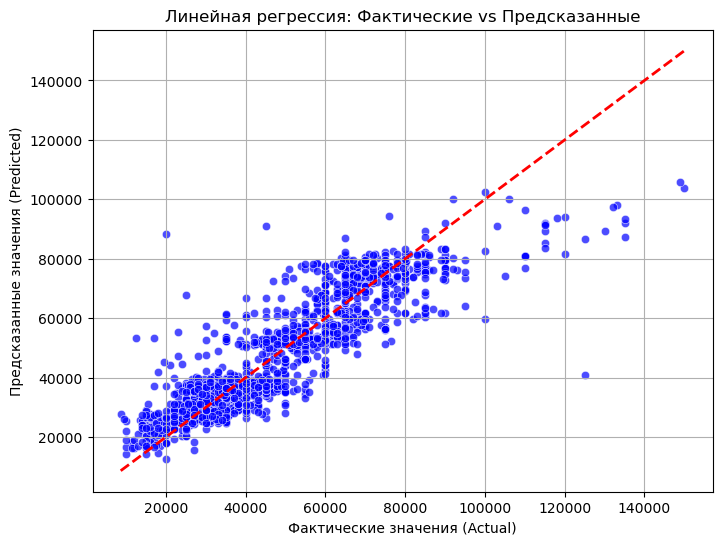

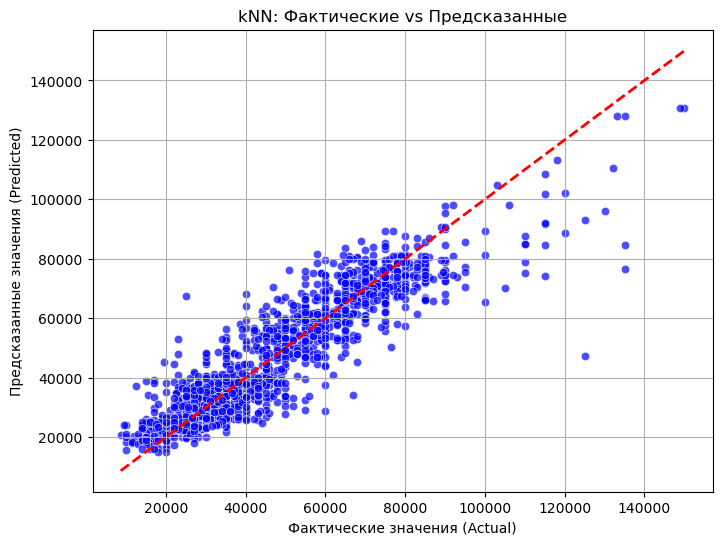

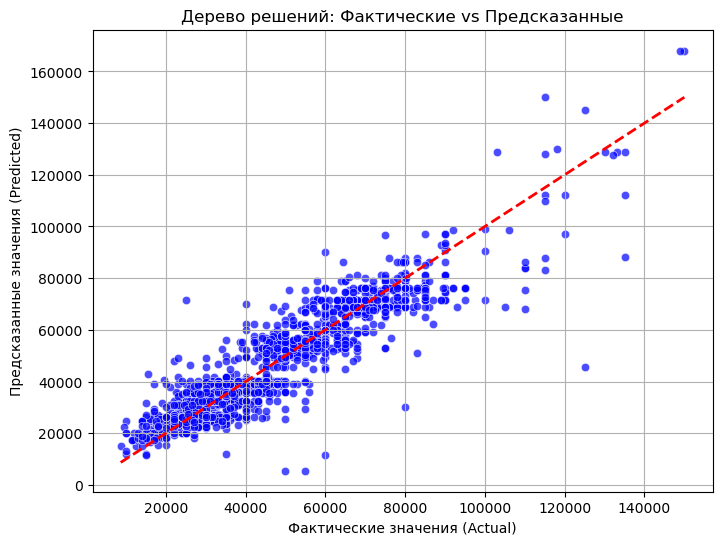

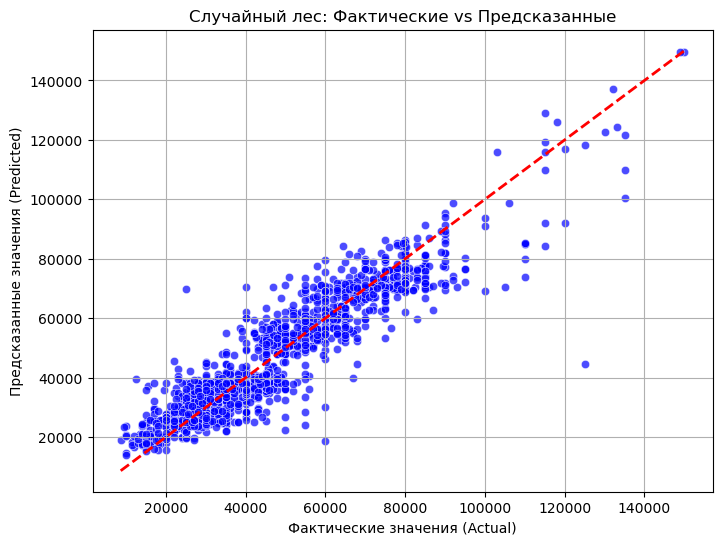

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация для одной модели
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
    plt.xlabel("Фактические значения (Actual)")
    plt.ylabel("Предсказанные значения (Predicted)")
    plt.title(f"{model_name}: Фактические vs Предсказанные")
    plt.grid()
    plt.show()

# Вызов функции для каждой модели
plot_actual_vs_predicted(y_test, y_pred_linear, "Линейная регрессия")
plot_actual_vs_predicted(y_test, y_pred_knn, "kNN")
plot_actual_vs_predicted(y_test, y_pred_tree, "Дерево решений")
plot_actual_vs_predicted(y_test, y_pred_forest, "Случайный лес")


#### Сравнение ошибок моделей (Bar Chart for MSE)

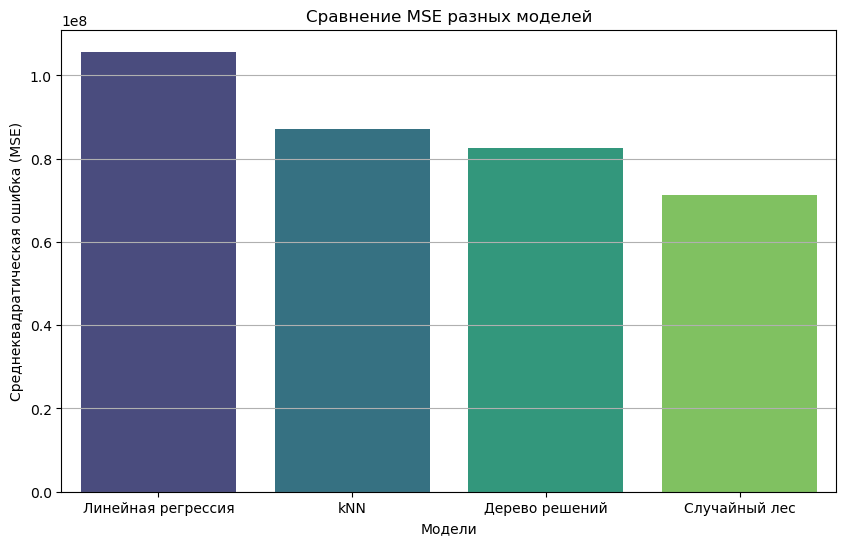

In [256]:
# Сохранение ошибок для сравнения
models = ["Линейная регрессия", "kNN", "Дерево решений", "Случайный лес"]
mse_values = [
    mean_squared_error(y_test, y_pred_linear),
    mean_squared_error(y_test, y_pred_knn),
    mean_squared_error(y_test, y_pred_tree),
    mean_squared_error(y_test, y_pred_forest)
]

# Построение столбчатого графика с палитрой
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values, hue=models, dodge=False, palette="viridis", legend=False)
plt.xlabel("Модели")
plt.ylabel("Среднеквадратическая ошибка (MSE)")
plt.title("Сравнение MSE разных моделей")
plt.grid(axis='y')
plt.show()


#### Важность признаков для деревьев решений и случайного леса

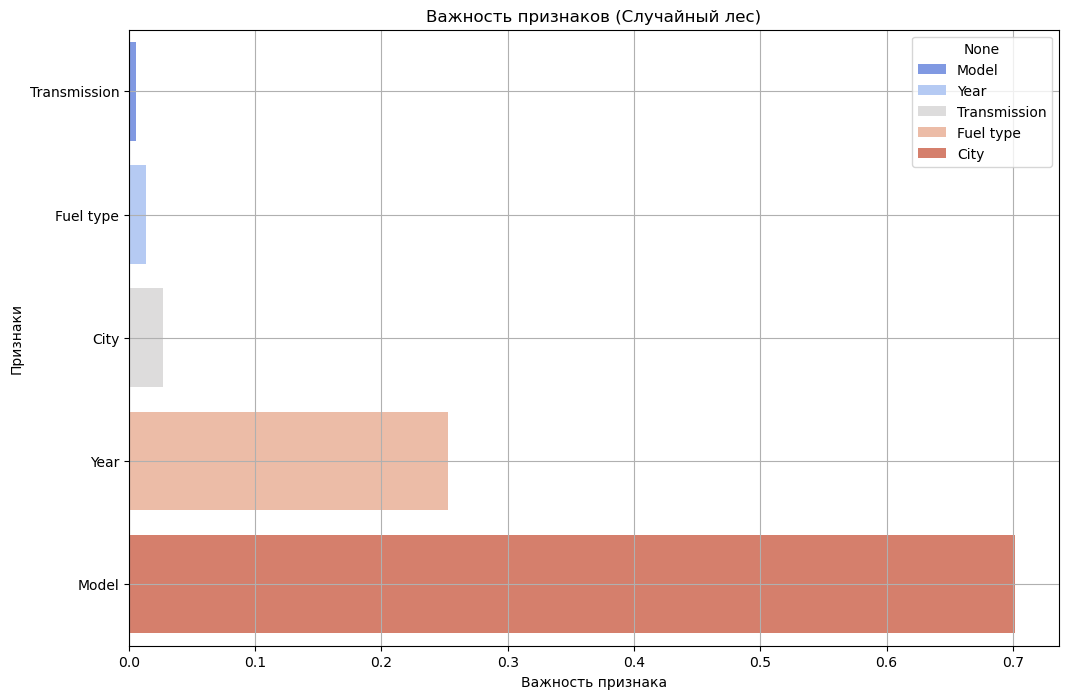

In [258]:
# Важность признаков для деревьев решений и случайного леса
feature_importances = forest_model.feature_importances_
features = X.columns  

# Сортировка важности признаков
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx], palette="coolwarm", hue=features)
plt.xlabel("Важность признака")
plt.ylabel("Признаки")
plt.title("Важность признаков (Случайный лес)")
plt.grid(True)
plt.show()

#### Линейная регрессия: Визуализация коэффициентов

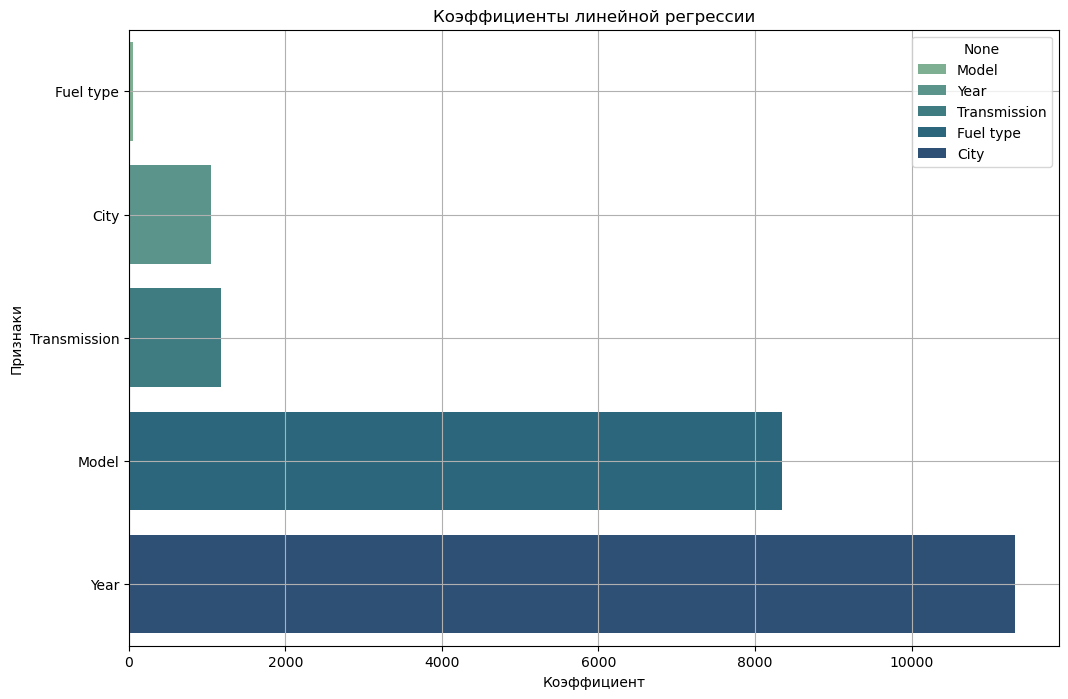

In [260]:
# Коэффициенты линейной регрессии
coefficients = linear_model.coef_
features = X.columns

sorted_idx = np.argsort(coefficients)

plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients[sorted_idx], y=features[sorted_idx], palette="crest", hue=features)
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.grid(True)
plt.show()


#### Итог:

- **Actual vs Predicted**: Показывает качество предсказаний.
- **MSE Bar Chart**: Помогает сравнить ошибки моделей.
- **Feature Importances**: Анализирует, какие признаки наиболее значимы для деревьев решений и случайного леса.
- **Linear Regression Coefficients**: Показывает вклад каждого признака в линейной регрессии.

Эти визуализации дадут нам полное представление о работе моделей и помогут выбрать лучшую.

### 7. Оптимизация гиперпараметров

#### Линейная регрессия

In [262]:
from sklearn.model_selection import GridSearchCV

# Параметры для GridSearchCV
linear_params = {'fit_intercept': [True, False]}

# Настройка GridSearchCV
grid_linear = GridSearchCV(LinearRegression(), linear_params, cv=5, scoring='neg_mean_squared_error')
grid_linear.fit(X_train, y_train)

# Результат
print("Лучшие параметры для линейной регрессии:", grid_linear.best_params_)
print("Лучший MSE:", -grid_linear.best_score_)


Лучшие параметры для линейной регрессии: {'fit_intercept': True}
Лучший MSE: 103770075.49320714


#### kNN (k-ближайших соседей)

In [264]:
# Параметры для GridSearchCV
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Настройка GridSearchCV
grid_knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train, y_train)

# Результат
print("Лучшие параметры для kNN:", grid_knn.best_params_)
print("Лучший MSE:", -grid_knn.best_score_)


Лучшие параметры для kNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Лучший MSE: 87838758.560895


#### Дерево решений (Decision tree)

In [266]:
# Параметры для GridSearchCV
tree_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Настройка GridSearchCV
grid_tree = GridSearchCV(DecisionTreeRegressor(), tree_params, cv=5, scoring='neg_mean_squared_error')
grid_tree.fit(X_train, y_train)

# Результат
print("Лучшие параметры для дерева решений:", grid_tree.best_params_)
print("Лучший MSE:", -grid_tree.best_score_)


Лучшие параметры для дерева решений: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
Лучший MSE: 81773779.7867271


#### Случайный лес (Random forest) 


In [268]:
# Параметры для GridSearchCV
forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Настройка GridSearchCV
grid_forest = GridSearchCV(RandomForestRegressor(), forest_params, cv=5, scoring='neg_mean_squared_error')
grid_forest.fit(X_train, y_train)

# Результат
print("Лучшие параметры для случайного леса:", grid_forest.best_params_)
print("Лучший MSE:", -grid_forest.best_score_)

Лучшие параметры для случайного леса: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Лучший MSE: 75439583.25847816


### Заключение проекта

Проект по прогнозированию цен автомобилей показал, что выбор модели и тщательная оценка ее производительности — это ключевые шаги для достижения точных предсказаний. В ходе работы использовались несколько алгоритмов, включая линейную регрессию, kNN, дерево решений и случайный лес, каждый из которых имеет свои преимущества и недостатки.

1. **Оценка моделей:** Все модели показали свои сильные стороны в разных аспектах. Линейная регрессия — это базовый и интерпретируемый алгоритм, который может быть полезен при работе с линейными зависимостями. Однако более сложные модели, такие как случайный лес и дерево решений, продемонстрировали лучшие результаты в плане точности прогнозов, что подтверждается более низкими ошибками (MSE и RMSE).

2. **Визуализация и интерпретация:** Визуализации, такие как графики фактических значений против предсказанных, сравнение ошибок моделей и анализ важности признаков, помогли наглядно продемонстрировать работу каждой модели. Это не только улучшает интерпретацию результатов, но и способствует выбору наилучшей модели на основе конкретных метрик, таких как MSE, RMSE и R².


3. **Рекомендации:** На основании сравнения моделей и их ошибок можно сделать вывод, что более сложные алгоритмы, такие как случайный лес, дают лучшие результаты в прогнозировании цен автомобилей. В то же время линейная регрессия может служить хорошей отправной точкой для базового анализа. Важность признаков, выявленная с помощью случайного леса, также помогает понять, какие факторы наиболее значимы при определении цены.

В целом, проект продемонстрировал эффективность использования разных моделей для решения задачи прогнозирования цен и показал, как важно не только выбирать лучшие алгоритмы, но и правильно интерпретировать результаты с помощью визуализаций и метрик.